In [1]:
from argparse import Namespace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings

warnings.filterwarnings('ignore')

In [2]:
DATA_DIR_ENTROPY = os.path.join('dataset_all_entropy.csv')
dataset_entropy = pd.read_csv(DATA_DIR_ENTROPY)
dataset_all_events = pd.DataFrame(dataset_entropy, columns=['phase_entropy','dispersion_entropy','approximate_entropy','fuzzy_entropy','label'])
dataset_all_events

,phase_entropy,dispersion_entropy,approximate_entropy,fuzzy_entropy,label
0,0.871765,1.467709,0.492588,0.021454,0
1,0.868714,0.802964,0.152549,0.023901,0
2,0.884751,1.261151,0.229232,0.027334,0
3,0.788908,0.965312,0.196923,0.007077,0
4,0.905744,1.226413,0.195498,0.025497,0
...,...,...,...,...,...
14545,0.839110,1.278987,0.361874,0.027600,1
14546,0.900999,1.150330,0.144654,0.026512,1
14547,0.871264,1.236292,0.288067,0.031721,1
14548,0.902139,1.267327,0.142997,0.021764,1


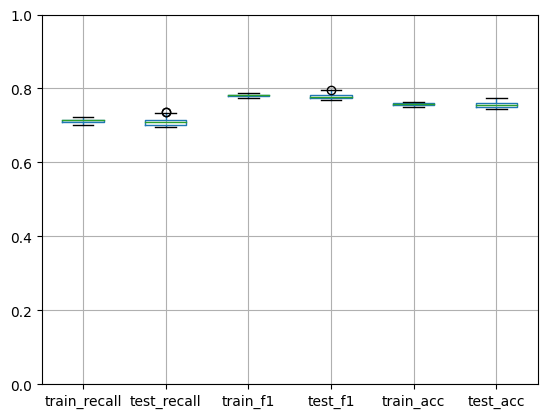

train_recall    0.712634
test_recall     0.710536
train_f1        0.780608
test_f1         0.779543
train_acc       0.757302
test_acc        0.756242
dtype: float64


In [19]:
train_recall_lr = []
test_recall_lr = []

train_f1_lr = []
test_f1_lr = []

train_acc_lr = []
test_acc_lr = []


for i in range(30):

    dataset_num = dataset_all_events.label.value_counts().min()
    gait_label_0 = dataset_all_events[dataset_all_events['label']==0]
    gait_label_1 = dataset_all_events[dataset_all_events['label']==1]

    gait_label_0_train = gait_label_0.sample(dataset_num)
    gait_label_1_train = gait_label_1.sample(dataset_num)

    gait_baseline_model_dataset = pd.concat([gait_label_0_train, gait_label_1_train])

    gait_baseline_model_dataset = shuffle(gait_baseline_model_dataset).reset_index(drop=True) # disrupt the order

    X = gait_baseline_model_dataset.iloc[:, 0:-1]
    Y = gait_baseline_model_dataset.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

    # normalisation
    X_scaler = StandardScaler().fit(X_train)
    standardized_X_train = X_scaler.transform(X_train)
    standardized_X_test = X_scaler.transform(X_test)

    # Initialising the model and training
    # linear_svc = SVC(kernel='linear', C=0.5, class_weight='balanced', random_state=10).fit(X_train, y_train)    
    linear_svc = SVC(kernel='rbf',C=0.4,gamma=0.5,class_weight = 'balanced',random_state=10).fit(X_train, y_train)    
    # prediction and results
    training = linear_svc.predict(X_train)
    testing=linear_svc.predict(X_test)

    train_recall = recall_score(training,y_train)
    train_f1 = f1_score(training,y_train)
    train_accuracy = accuracy_score(training,y_train)

    test_recall = recall_score(testing,y_test)
    test_f1 = f1_score(testing,y_test)
    test_accuracy = accuracy_score(testing,y_test)

    train_recall_i = train_recall
    test_recall_i = test_recall

    train_f1_i = train_f1
    test_f1_i = test_f1

    train_acc_i = train_accuracy
    test_acc_i = test_accuracy

    train_recall_lr.append(train_recall_i)
    test_recall_lr.append(test_recall_i)
    train_f1_lr.append(train_f1_i)
    test_f1_lr.append(test_f1_i)
    train_acc_lr.append(train_acc_i)
    test_acc_lr.append(test_acc_i)

train_recall_lr = pd.DataFrame(train_recall_lr, columns=['train_recall'])
test_recall_lr = pd.DataFrame(test_recall_lr, columns=['test_recall'])
train_f1_lr = pd.DataFrame(train_f1_lr, columns=['train_f1'])
test_f1_lr = pd.DataFrame(test_f1_lr, columns = ['test_f1'])
train_acc_lr = pd.DataFrame(train_acc_lr, columns=['train_acc'])
test_acc_lr = pd.DataFrame(test_acc_lr, columns=['test_acc'])

all_events_recall_logic_reg = pd.concat([train_recall_lr, test_recall_lr, train_f1_lr, test_f1_lr,train_acc_lr,test_acc_lr],axis=1)
# all_events_recall_logic_reg = pd.concat([cv_score],axis=1)
all_events_recall_logic_reg.to_csv('evaluation_entropy_SVM.csv')
all_events_recall_logic_reg.boxplot()  
plt.ylim(0,1) 
plt.show()
print(all_events_recall_logic_reg.mean())